In [117]:

import os

source_dir = '/Volumes/Data/results/dino2_0_resnet_selected'

os.chdir(source_dir)

print(os.getcwd())

/Volumes/Data/results/dino2_0_resnet_selected


In [118]:
from os import listdir
from os.path import isfile, join

filenames = [f for f in listdir(source_dir) if isfile(join(source_dir, f))]

print( filenames )

['simplex.csv', 'mean_point.csv', 'sed.csv', 'jsd.csv', 'perfect_point.csv', 'cos.csv', 'msed.csv', 'average.csv']


In [119]:
import pandas as pd

data = dict()

for f in filenames:
    key = f.split('.')[0]
    print( f"Reading file {f} into data as {key}" )
    data[key] = pd.read_csv(f)


Reading file simplex.csv into data as simplex
Reading file mean_point.csv into data as mean_point
Reading file sed.csv into data as sed
Reading file jsd.csv into data as jsd
Reading file perfect_point.csv into data as perfect_point
Reading file cos.csv into data as cos
Reading file msed.csv into data as msed
Reading file average.csv into data as average


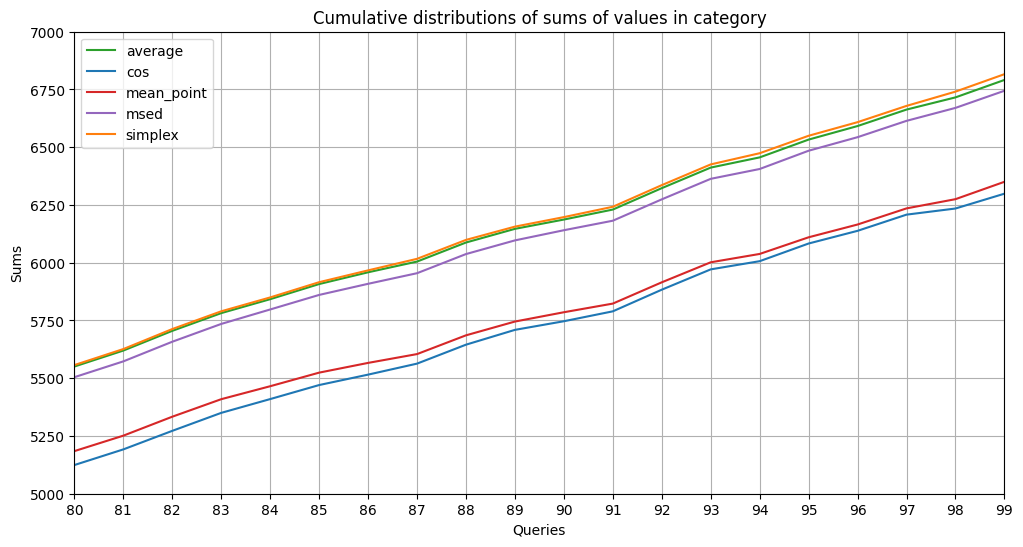

In [120]:
# This plots the cummulative distributions of poly sums

# Set up the plotting infrastructure

from matplotlib.rcsetup import cycler
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams["axes.prop_cycle"] = cycler('color', ['#2ca02c', '#1f77b4', '#d62728', '#9467bd', '#ff7f0e', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])

fig, ax = plt.subplots(figsize=(12, 6))

del data['jsd']
del data['sed']
del data['perfect_point']

data_keys = data.keys()
data_keys = sorted(data_keys)
for key in data_keys:    
    column = data[key]["best_poly_sums"]
    n_bins = column.size
    # plot the cumulative histogram
    ax.plot(column.cumsum()[80:101], label=key)


# pull out the euc data from any one of the data frames.

# column = data['simplex']["best_single_sums"]
# n_bins = column.size
# # plot the cumulative histogram
# ax.plot(column.cumsum()[80:101], label='euc') # 

# tidy up the figure
ax.set_xlim(80,99)
ax.set_ylim(5000,7000)
ax.grid(True)
ax.legend(loc='upper left')
ax.set_title('Cumulative distributions of sums of values in category')
ax.set_xlabel('Queries')
ax.set_ylabel('Sums')

plt.xticks(np.linspace(80,99,20, endpoint=True))

plt.show()

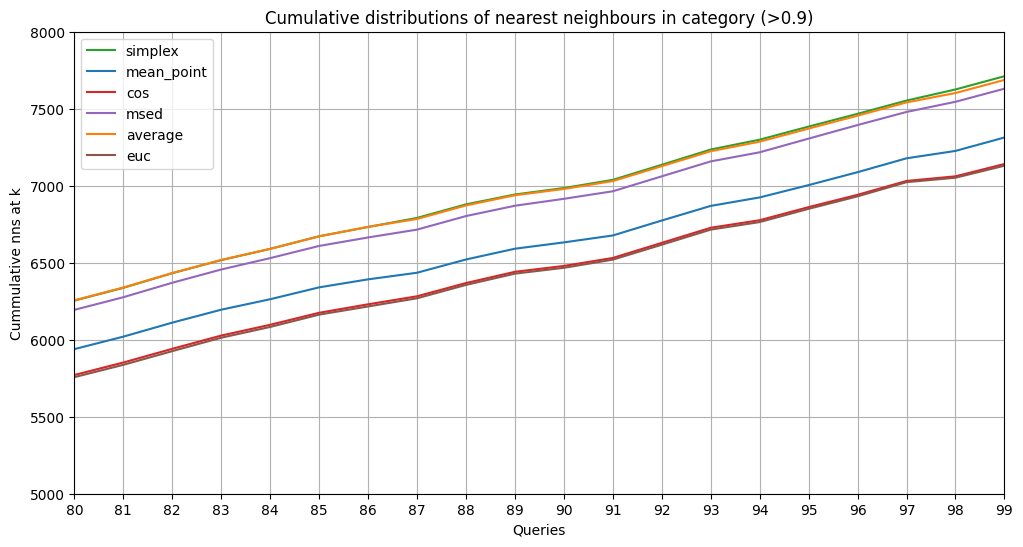

In [121]:
# This plots the cummulative distributions of nns_at_k_poly

# Set up the plotting infrastructure

import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))

for key in data:    
    column = data[key]["nns_at_k_poly"]
    n_bins = column.size
    # plot the cumulative histogram
    ax.plot(column.cumsum()[80:101], label=key) # [80:101]

# pull out the euc data from any one of the data frames.

column = data['simplex']["nns_at_k_single"]
n_bins = column.size
# plot the cumulative histogram
ax.plot(column.cumsum()[80:101], label='euc')

# tidy up the figure
ax.set_xlim(80,99)
ax.set_ylim(5000,8000)
ax.grid(True)
ax.legend(loc='upper left')
ax.set_title('Cumulative distributions of nearest neighbours in category (>0.9)')
ax.set_xlabel('Queries')
ax.set_ylabel('Cummulative nns at k')

plt.xticks(np.linspace(80,99,20, endpoint=True))

plt.show()